In [1]:
import numpy
import tensorflow as tf
import pandas
pandas.set_option('display.precision',10)
from tensorflow.keras import layers
##from tf.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
# load dataset
df = pandas.read_csv("datasets - Combined.csv")
df.head()

,game,ranking_idol,event_type,year,month,duration_days,t1_cutoff,t2_cutoff,t3_cutoff,t4_cutoff,t5_cutoff,t6_cutoff
0,SIF,minami_kotori,token,2013,5,14,24781,15000,10000,NaN,NaN,NaN
1,SIF,sonoda_umi,token,2013,5,14,30655,15000,10000,NaN,NaN,NaN
2,SIF,yazawa_nico,token,2013,6,13,47472,31330,10000,NaN,NaN,NaN
3,SIF,minami_kotori,token,2013,6,9,26333,16246,10000,NaN,NaN,NaN
4,SIF,sonoda_umi,token,2013,7,7,26846,16800,10000,NaN,NaN,NaN


In [3]:
#One hot encoding
#Encode game
game = df['game']
game_dummy = pandas.get_dummies(game,prefix='game')
game_dummy.head()

,game_SIF,game_mltd
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [4]:
#Encode Idols
idol = df['ranking_idol']
idol_dummy = pandas.get_dummies(idol,prefix='idol')
idol_dummy.head()

,idol_akizuki ritsuko,idol_amami haruka,idol_ayase_eli,idol_emily stewart,idol_fukuda noriko,idol_futami ami,idol_futami mami,idol_ganaha hibiki,idol_hagiwara yukiho,idol_hakozaki serika,...,idol_tenkubashi tomoka,idol_tokoro megumi,idol_tokugawa matsuri,idol_toujou_nozomi,idol_toyokawa fuuka,idol_tsushima_yoshiko,idol_watanabe_you,idol_yabuki kana,idol_yazawa_nico,idol_yokoyama nao
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#Encode Event Types
event_type = df['event_type']
event_type_dummy = pandas.get_dummies(event_type,prefix='event_type')
event_type_dummy.head()

,event_type_anniv,event_type_challenge_festival,event_type_friendly_match,event_type_medley_festival,event_type_score_match,event_type_theater,event_type_token,event_type_tour,event_type_touring_rally
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0


In [6]:
#Drop Data
df.drop(['game'],axis=1,inplace=True)
df.drop(['ranking_idol'],axis=1,inplace=True)
df.drop(['event_type'],axis=1,inplace=True)
df.head()

,year,month,duration_days,t1_cutoff,t2_cutoff,t3_cutoff,t4_cutoff,t5_cutoff,t6_cutoff
0,2013,5,14,24781,15000,10000,NaN,NaN,NaN
1,2013,5,14,30655,15000,10000,NaN,NaN,NaN
2,2013,6,13,47472,31330,10000,NaN,NaN,NaN
3,2013,6,9,26333,16246,10000,NaN,NaN,NaN
4,2013,7,7,26846,16800,10000,NaN,NaN,NaN


In [7]:
#Concat Data
df = pandas.concat([game_dummy,idol_dummy,event_type_dummy,df],axis=1)
df.head()

,game_SIF,game_mltd,idol_akizuki ritsuko,idol_amami haruka,idol_ayase_eli,idol_emily stewart,idol_fukuda noriko,idol_futami ami,idol_futami mami,idol_ganaha hibiki,...,event_type_touring_rally,year,month,duration_days,t1_cutoff,t2_cutoff,t3_cutoff,t4_cutoff,t5_cutoff,t6_cutoff
0,1,0,0,0,0,0,0,0,0,0,...,0,2013,5,14,24781,15000,10000,NaN,NaN,NaN
1,1,0,0,0,0,0,0,0,0,0,...,0,2013,5,14,30655,15000,10000,NaN,NaN,NaN
2,1,0,0,0,0,0,0,0,0,0,...,0,2013,6,13,47472,31330,10000,NaN,NaN,NaN
3,1,0,0,0,0,0,0,0,0,0,...,0,2013,6,9,26333,16246,10000,NaN,NaN,NaN
4,1,0,0,0,0,0,0,0,0,0,...,0,2013,7,7,26846,16800,10000,NaN,NaN,NaN


In [8]:
df.shape

(232, 90)

In [9]:
#Zscoring
df['t1_zscore'] = (df['t1_cutoff'] - df['t1_cutoff'].mean())/df['t1_cutoff'].std()
df['t2_zscore'] = (df['t2_cutoff'] - df['t2_cutoff'].mean())/df['t2_cutoff'].std()   
df['t3_zscore'] = (df['t3_cutoff'] - df['t3_cutoff'].mean())/df['t3_cutoff'].std()   
df.head()
df.shape

(232, 93)

In [10]:
#Split data
# split into input (X) and output (Y) variables
dataset = df.values
X = dataset[:,0:84]
Y = dataset[:,90:93]
X_train = dataset[:165,0:84]
X_test = dataset[165:,0:84]
Y_train = dataset[:165,90:93]
Y_test = dataset[165:,90:93]

In [82]:
std_df = df.copy()
std_df = std_df[:165]

std_t1 = std_df['t1_cutoff'].std()
std_t2 = std_df['t2_cutoff'].std()
std_t3 = std_df['t3_cutoff'].std()

mean_t1 = std_df['t1_cutoff'].mean()
mean_t2 = std_df['t2_cutoff'].mean()
mean_t3 = std_df['t3_cutoff'].mean()



print(std_t1)
print(std_t2)
print(std_t3)
asdf = df.values
asdf = asdf[0:1,90:91]
print(asdf*std_t1+mean_t1)
std_df.head()

440490.347450555
41201.30059623555
46282.83164789646
[[40980.54378947]]


,game_SIF,game_mltd,idol_akizuki ritsuko,idol_amami haruka,idol_ayase_eli,idol_emily stewart,idol_fukuda noriko,idol_futami ami,idol_futami mami,idol_ganaha hibiki,...,duration_days,t1_cutoff,t2_cutoff,t3_cutoff,t4_cutoff,t5_cutoff,t6_cutoff,t1_zscore,t2_zscore,t3_zscore
0,1,0,0,0,0,0,0,0,0,0,...,14,24781,15000,10000,NaN,NaN,NaN,-0.7456546467,-1.5243391319,-0.8602797794
1,1,0,0,0,0,0,0,0,0,0,...,14,30655,15000,10000,NaN,NaN,NaN,-0.7304867756,-1.5243391319,-0.8602797794
2,1,0,0,0,0,0,0,0,0,0,...,13,47472,31330,10000,NaN,NaN,NaN,-0.6870618373,-1.0966500753,-0.8602797794
3,1,0,0,0,0,0,0,0,0,0,...,9,26333,16246,10000,NaN,NaN,NaN,-0.7416470648,-1.4917059069,-0.8602797794
4,1,0,0,0,0,0,0,0,0,0,...,7,26846,16800,10000,NaN,NaN,NaN,-0.7403223937,-1.4771964312,-0.8602797794


In [11]:
#Predict
from tensorflow.keras.models import Sequential
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

In [12]:
epoch = 1000
batch = 5

def final_model():
    # create model
    model = Sequential()
    model.add(Dense(134, input_dim=84, kernel_initializer='normal', activation='relu'))
    model.add(Dense(3, kernel_initializer='normal'))
    model.add(Dense(3, kernel_initializer='normal'))
    model.add(Dense(3, activation='linear'))
    
    model.compile(loss='mean_absolute_error', optimizer='rmsprop')
    
    return model

In [13]:
#fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=final_model(), epochs=1000, batch_size=5, verbose=0)

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
model = final_model()
model.fit(X_train, Y_train, epochs=1000,batch_size=5,verbose=0)
#1k/5 -0.28 (0.08) MAE

Instructions for updating:
Use tf.cast instead.


In [15]:
X = X_test
Y = Y_test
Y_test.shape

(67, 3)

In [16]:
numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=final_model, epochs=1000, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Final: %.2f (%.2f) MAE" % (results.mean(), results.std()))

Final: -0.27 (0.08) MAE


In [21]:
ynew = model.predict(X)
indexes = [0]*len(X)
t1_act = [0]*len(X)
t1_pred= [0]*len(X)
t2_act = [0]*len(X)
t2_pred= [0]*len(X)
t3_act = [0]*len(X)
t3_pred= [0]*len(X)
for i in range(len(X)):
    print("Actual=(%s,%s,%s), Predicted=(%s,%s,%s)" % (Y[i][0],Y[i][1],Y[i][2], ynew[i][0],ynew[i][1],ynew[i][2]))
    t1_act[i] = Y[i][0]
    t2_act[i] = Y[i][1]
    t3_act[i] = Y[i][2]
    t1_pred[i] = ynew[i][0]
    t2_pred[i] = ynew[i][1]
    t3_pred[i] = ynew[i][2]
    
    indexes[i] = i

Actual=(-0.4233980682805936,-0.1427437175221068,0.17536699499270886), Predicted=(-0.30376163,0.011379577,0.13985808)
Actual=(0.1275979590203415,0.794584123810589,0.30111749749523903), Predicted=(-0.18875998,0.3252644,0.426013)
Actual=(0.20926018621566292,1.0716522518236262,0.47442296068868156), Predicted=(0.6933401,1.4592719,1.4042182)
Actual=(-0.5444415010713568,-0.46624740569840284,0.030536098845513747), Predicted=(-0.4722669,-0.69746816,-0.25317138)
Actual=(0.20913365817985038,1.0389142652449046,0.5337571439867594), Predicted=(0.33648792,1.2974919,1.1778965)
Actual=(-0.37879306234946375,0.048367552929838804,0.1574547887140438), Predicted=(-0.40670928,-0.48876384,-0.11800254)
Actual=(-0.27595417348682755,0.4181496589338158,0.2981970290802393), Predicted=(-0.2530595,0.19778657,0.317527)
Actual=(-0.3095460758926437,0.4765018462117293,0.37227957787406585), Predicted=(-0.25090942,0.19229934,0.3130806)
Actual=(-0.4342665683364073,-0.025253631288390484,0.1706699082919176), Predicted=(-0.40

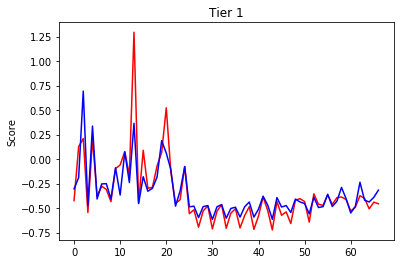

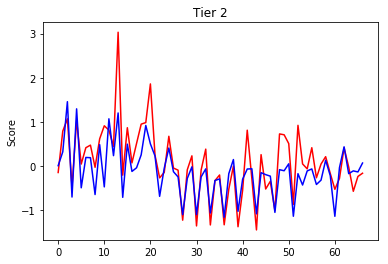

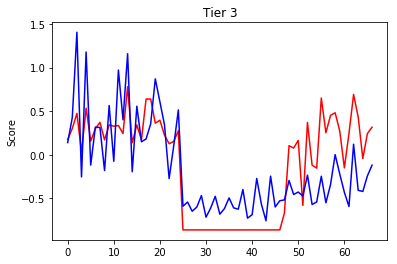

In [22]:
#Visualization
import matplotlib.pyplot as plt
plt.title('Tier 1')
plt.plot(indexes,t1_act,color='red')
plt.plot(indexes,t1_pred,color='blue')
plt.ylabel('Score')
plt.show()

plt.title('Tier 2')
plt.plot(indexes,t2_act,color='red')
plt.plot(indexes,t2_pred,color='blue')
plt.ylabel('Score')
plt.show()

plt.title('Tier 3')
plt.plot(indexes,t3_act,color='red')
plt.plot(indexes,t3_pred,color='blue')
plt.ylabel('Score')
plt.show()

In [19]:
# #Visualization,limited
# import matplotlib.pyplot as plt
# plt.title('Tier 1')
# plt.plot(indexes,t1_act[150:200],color='red')
# plt.plot(indexes,t1_pred[150:200],color='blue')
# plt.ylabel('Score')
# plt.show()

# plt.title('Tier 2')
# plt.plot(indexes,t2_act[150:200],color='red')
# plt.plot(indexes,t2_pred[150:200],color='blue')
# plt.ylabel('Score')
# plt.show()

# plt.title('Tier 3')
# plt.plot(indexes,t3_act[150:200],color='red')
# plt.plot(indexes,t3_pred[150:200],color='blue')
# plt.ylabel('Score')
# plt.show()

In [20]:
# #Saving model
# from keras.models import load_model
# final_model.save('idol_model.h5')
# del final_model #delete existing model, prevents duplicating

# #Loading model
# final_model = load_model('idol_model.h5')

In [25]:
df.axes

[RangeIndex(start=0, stop=232, step=1),
 Index(['game_SIF', 'game_mltd', 'idol_akizuki ritsuko', 'idol_amami haruka',
        'idol_ayase_eli', 'idol_emily stewart', 'idol_fukuda noriko',
        'idol_futami ami', 'idol_futami mami', 'idol_ganaha hibiki',
        'idol_hagiwara yukiho', 'idol_hakozaki serika', 'idol_handa roco',
        'idol_hoshi miki', 'idol_hoshizora_rin', 'idol_ibuki tsubasa',
        'idol_julia', 'idol_kasuga mirai', 'idol_kikuchi makoto',
        'idol_kinoshita hinata', 'idol_kisaragi chihaya', 'idol_kitakami reika',
        'idol_kitazawa shiho', 'idol_koizumi_hanayo', 'idol_konomi baba',
        'idol_kousaka umi', 'idol_kousaka_honoka', 'idol_kunikida_hanamaru',
        'idol_kurosawa_dia', 'idol_kurosawa_ruby', 'idol_maihama ayumu',
        'idol_makabe mizuki', 'idol_matsuda arisa', 'idol_matsuura_kanan',
        'idol_minami_kotori', 'idol_minase iori', 'idol_miura azusa',
        'idol_miyao miya', 'idol_mochizuki anna', 'idol_mogami shizuka',
        

In [26]:
df.head()

,game_SIF,game_mltd,idol_akizuki ritsuko,idol_amami haruka,idol_ayase_eli,idol_emily stewart,idol_fukuda noriko,idol_futami ami,idol_futami mami,idol_ganaha hibiki,...,duration_days,t1_cutoff,t2_cutoff,t3_cutoff,t4_cutoff,t5_cutoff,t6_cutoff,t1_zscore,t2_zscore,t3_zscore
0,1,0,0,0,0,0,0,0,0,0,...,14,24781,15000,10000,NaN,NaN,NaN,-0.7456546467,-1.5243391319,-0.8602797794
1,1,0,0,0,0,0,0,0,0,0,...,14,30655,15000,10000,NaN,NaN,NaN,-0.7304867756,-1.5243391319,-0.8602797794
2,1,0,0,0,0,0,0,0,0,0,...,13,47472,31330,10000,NaN,NaN,NaN,-0.6870618373,-1.0966500753,-0.8602797794
3,1,0,0,0,0,0,0,0,0,0,...,9,26333,16246,10000,NaN,NaN,NaN,-0.7416470648,-1.4917059069,-0.8602797794
4,1,0,0,0,0,0,0,0,0,0,...,7,26846,16800,10000,NaN,NaN,NaN,-0.7403223937,-1.4771964312,-0.8602797794


In [27]:
fresh = df.copy()

In [28]:
fresh.head()

,game_SIF,game_mltd,idol_akizuki ritsuko,idol_amami haruka,idol_ayase_eli,idol_emily stewart,idol_fukuda noriko,idol_futami ami,idol_futami mami,idol_ganaha hibiki,...,duration_days,t1_cutoff,t2_cutoff,t3_cutoff,t4_cutoff,t5_cutoff,t6_cutoff,t1_zscore,t2_zscore,t3_zscore
0,1,0,0,0,0,0,0,0,0,0,...,14,24781,15000,10000,NaN,NaN,NaN,-0.7456546467,-1.5243391319,-0.8602797794
1,1,0,0,0,0,0,0,0,0,0,...,14,30655,15000,10000,NaN,NaN,NaN,-0.7304867756,-1.5243391319,-0.8602797794
2,1,0,0,0,0,0,0,0,0,0,...,13,47472,31330,10000,NaN,NaN,NaN,-0.6870618373,-1.0966500753,-0.8602797794
3,1,0,0,0,0,0,0,0,0,0,...,9,26333,16246,10000,NaN,NaN,NaN,-0.7416470648,-1.4917059069,-0.8602797794
4,1,0,0,0,0,0,0,0,0,0,...,7,26846,16800,10000,NaN,NaN,NaN,-0.7403223937,-1.4771964312,-0.8602797794


In [36]:
fresh = pandas.DataFrame(columns=df.columns)
fresh.head()

,game_SIF,game_mltd,idol_akizuki ritsuko,idol_amami haruka,idol_ayase_eli,idol_emily stewart,idol_fukuda noriko,idol_futami ami,idol_futami mami,idol_ganaha hibiki,...,duration_days,t1_cutoff,t2_cutoff,t3_cutoff,t4_cutoff,t5_cutoff,t6_cutoff,t1_zscore,t2_zscore,t3_zscore


In [37]:
newframe = pandas.read_csv("fresh.csv")
newframe.head()

,game,ranking_idol,event_type,year,month,duration_days,t1_cutoff,t2_cutoff,t3_cutoff
0,sif,matsuura_kanan,score_match,2019,4,10,51841,60314,124660
1,sif,koizumi_hanayo,touring_rally,2019,4,10,55152,69616,135688


In [41]:
fresh.to_csv('template.csv')

In [42]:
new_predict = pandas.read_csv('predict_sif.csv')
new_predict.head()

,Unnamed: 0,game_SIF,game_mltd,idol_akizuki ritsuko,idol_amami haruka,idol_ayase_eli,idol_emily stewart,idol_fukuda noriko,idol_futami ami,idol_futami mami,...,duration_days,t1_cutoff,t2_cutoff,t3_cutoff,t4_cutoff,t5_cutoff,t6_cutoff,t1_zscore,t2_zscore,t3_zscore
0,NaN,1,0,0,0,0,0,0,0,0,...,10,124660,60314,51841,0,0,0,0,0,0
1,NaN,1,0,0,0,0,0,0,0,0,...,10,135688,69616,55152,0,0,0,0,0,0


In [45]:
new_predict = new_predict.drop(["Unnamed: 0"], axis=1)

In [46]:
new_predict.head()

,game_SIF,game_mltd,idol_akizuki ritsuko,idol_amami haruka,idol_ayase_eli,idol_emily stewart,idol_fukuda noriko,idol_futami ami,idol_futami mami,idol_ganaha hibiki,...,duration_days,t1_cutoff,t2_cutoff,t3_cutoff,t4_cutoff,t5_cutoff,t6_cutoff,t1_zscore,t2_zscore,t3_zscore
0,1,0,0,0,0,0,0,0,0,0,...,10,124660,60314,51841,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,10,135688,69616,55152,0,0,0,0,0,0


In [47]:
X_final = new_predict.values
X_final = X_final[:,0:84]
print(X_final)

[[   1    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    1    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    1    0    0    0    0 2019    4   10]
 [   1    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    1    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    1 2019    4   10]]


In [102]:
X_results = model.predict(X_final)

In [103]:
print(X_results)

[[-0.44672284 -0.17497823 -0.52331775]
 [-0.3603125   0.09319595 -0.28067794]]


In [104]:
for i in range (0,2):
    X_results[i,0] = (X_results[i,0]*df['t1_cutoff'].std()) + df['t1_cutoff'].mean()
    X_results[i,1] = (X_results[i,1]*df['t2_cutoff'].std()) + df['t2_cutoff'].mean()
    X_results[i,2] = (X_results[i,2]*df['t3_cutoff'].std()) + df['t3_cutoff'].mean()

In [105]:
for i in range(0,2):
    for j in range (0,3):
        print(int(X_results[i,j]))

140547
66521
23845
174010
76760
33815


In [87]:
df['t1_cutoff'].std()

387265.9500745512

In [88]:
df['t1_cutoff'].mean()

313547.6551724138

In [89]:
df.head()

,game_SIF,game_mltd,idol_akizuki ritsuko,idol_amami haruka,idol_ayase_eli,idol_emily stewart,idol_fukuda noriko,idol_futami ami,idol_futami mami,idol_ganaha hibiki,...,duration_days,t1_cutoff,t2_cutoff,t3_cutoff,t4_cutoff,t5_cutoff,t6_cutoff,t1_zscore,t2_zscore,t3_zscore
0,1,0,0,0,0,0,0,0,0,0,...,14,24781,15000,10000,NaN,NaN,NaN,-0.7456546467,-1.5243391319,-0.8602797794
1,1,0,0,0,0,0,0,0,0,0,...,14,30655,15000,10000,NaN,NaN,NaN,-0.7304867756,-1.5243391319,-0.8602797794
2,1,0,0,0,0,0,0,0,0,0,...,13,47472,31330,10000,NaN,NaN,NaN,-0.6870618373,-1.0966500753,-0.8602797794
3,1,0,0,0,0,0,0,0,0,0,...,9,26333,16246,10000,NaN,NaN,NaN,-0.7416470648,-1.4917059069,-0.8602797794
4,1,0,0,0,0,0,0,0,0,0,...,7,26846,16800,10000,NaN,NaN,NaN,-0.7403223937,-1.4771964312,-0.8602797794


In [99]:
-0.3603125* df['t1_cutoff'].std() + df['t1_cutoff'].mean()

174010.89253617707